In [1]:
# Importing all libraries to be used
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('dataset/loan_approval_dataset.csv')

In [3]:
# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.shape


(4269, 13)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # For simplicity, we'll drop rows with missing values

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [7]:
# Check data types
print(df.dtypes)

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [8]:
df.nunique()


,0
loan_id,4269
no_of_dependents,6
education,2
self_employed,2
income_annum,98
loan_amount,378
loan_term,10
cibil_score,601
residential_assets_value,278
commercial_assets_value,188


In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


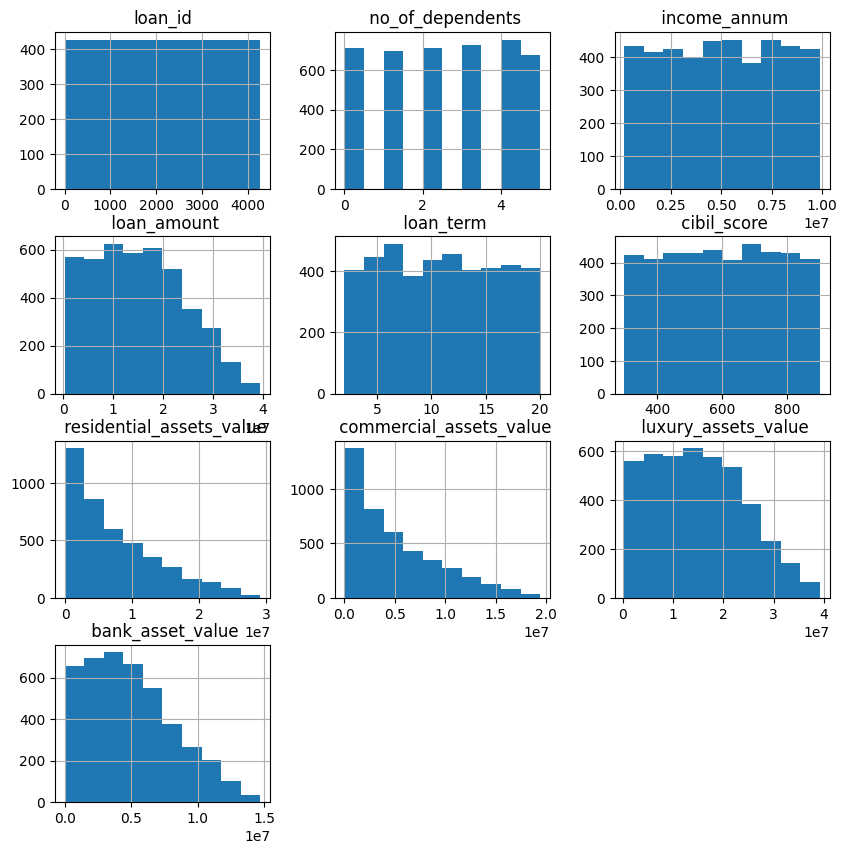

In [10]:
# Histogram
df.hist(figsize=(10, 10))
plt.show()

In [11]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [12]:
len(df.columns)

13

In [13]:
df.columns = df.columns.str.strip()

In [14]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [15]:
a=[' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status']

In [16]:
b=['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

In [17]:
len(b)

12

In [18]:
dic = dict(zip(a,b))
dic

{' no_of_dependents': 'no_of_dependents',
 ' education': 'education',
 ' self_employed': 'self_employed',
 ' income_annum': 'income_annum',
 ' loan_amount': 'loan_amount',
 ' loan_term': 'loan_term',
 ' cibil_score': 'cibil_score',
 ' residential_assets_value': 'residential_assets_value',
 ' commercial_assets_value': 'commercial_assets_value',
 ' luxury_assets_value': 'luxury_assets_value',
 ' bank_asset_value': 'bank_asset_value',
 ' loan_status': 'loan_status'}

In [19]:
df=df.rename(columns=dic)
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [20]:
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [21]:
df.duplicated().sum()


0

In [22]:
# Check the null values
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [23]:
df.columns


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [24]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [25]:
df['education'] = df['education'].str.strip()
df['self_employed'] =df['self_employed'].str.strip()
df['loan_status'] =df['loan_status'].str.strip()

In [26]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [27]:
print(df.isnull().sum())


loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


## Outlier Detection

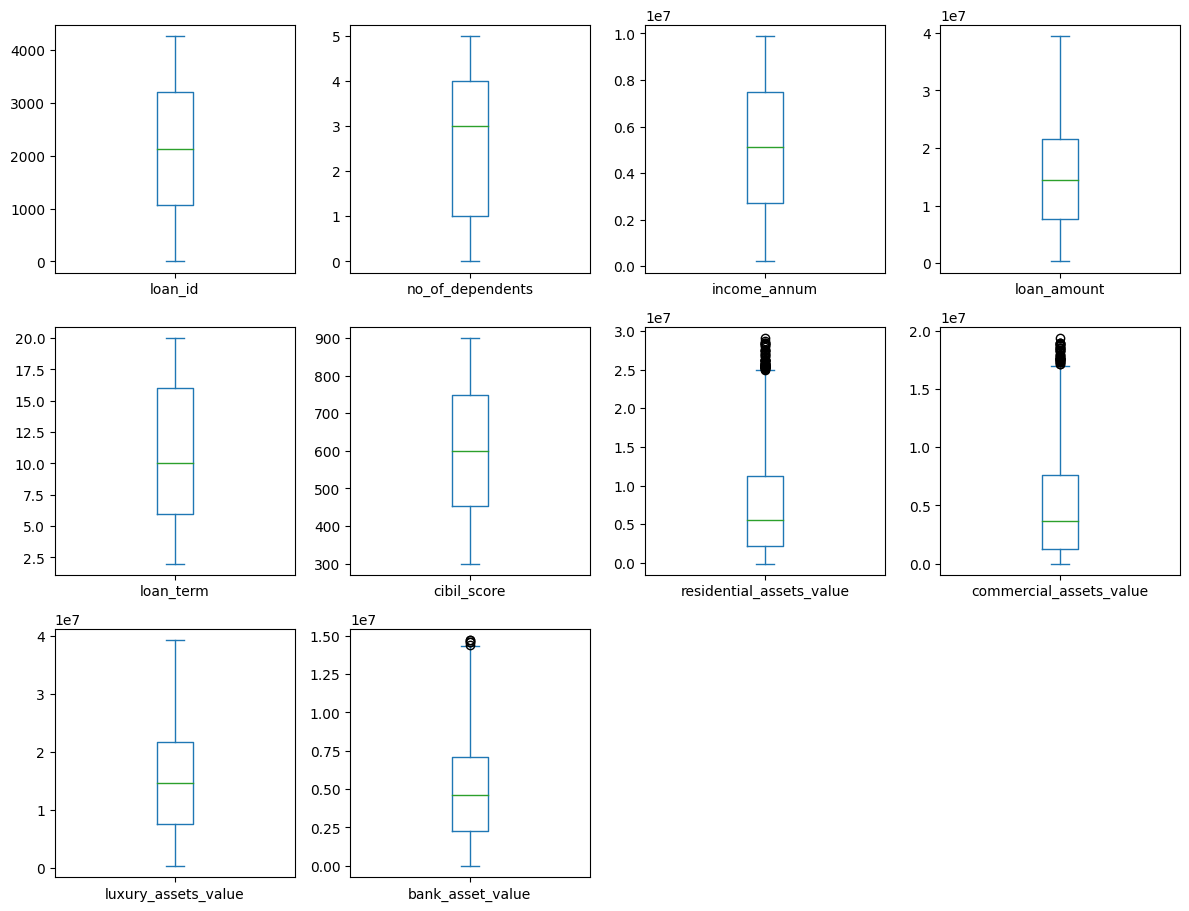

In [28]:
df.plot(kind='box', figsize= (12,12), layout=(4,4), sharex= False, subplots= True)
plt.tight_layout()

## Detecting Outliers using IQR

In [29]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [30]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

In [31]:
# Detect outliers using both methods
for column in df.select_dtypes(include=[np.number]).columns:
    iqr_outliers = detect_outliers_iqr(df, column)
    zscore_outliers = detect_outliers_zscore(df, column)

    print(f"\nColumn: {column}")
    print(f"IQR method outliers: {len(iqr_outliers)}")
    print(f"Z-score method outliers: {len(zscore_outliers)}")


Column: loan_id
IQR method outliers: 0
Z-score method outliers: 0

Column: no_of_dependents
IQR method outliers: 0
Z-score method outliers: 0

Column: income_annum
IQR method outliers: 0
Z-score method outliers: 0

Column: loan_amount
IQR method outliers: 0
Z-score method outliers: 0

Column: loan_term
IQR method outliers: 0
Z-score method outliers: 0

Column: cibil_score
IQR method outliers: 0
Z-score method outliers: 0

Column: residential_assets_value
IQR method outliers: 52
Z-score method outliers: 16

Column: commercial_assets_value
IQR method outliers: 37
Z-score method outliers: 17

Column: luxury_assets_value
IQR method outliers: 0
Z-score method outliers: 0

Column: bank_asset_value
IQR method outliers: 5
Z-score method outliers: 0


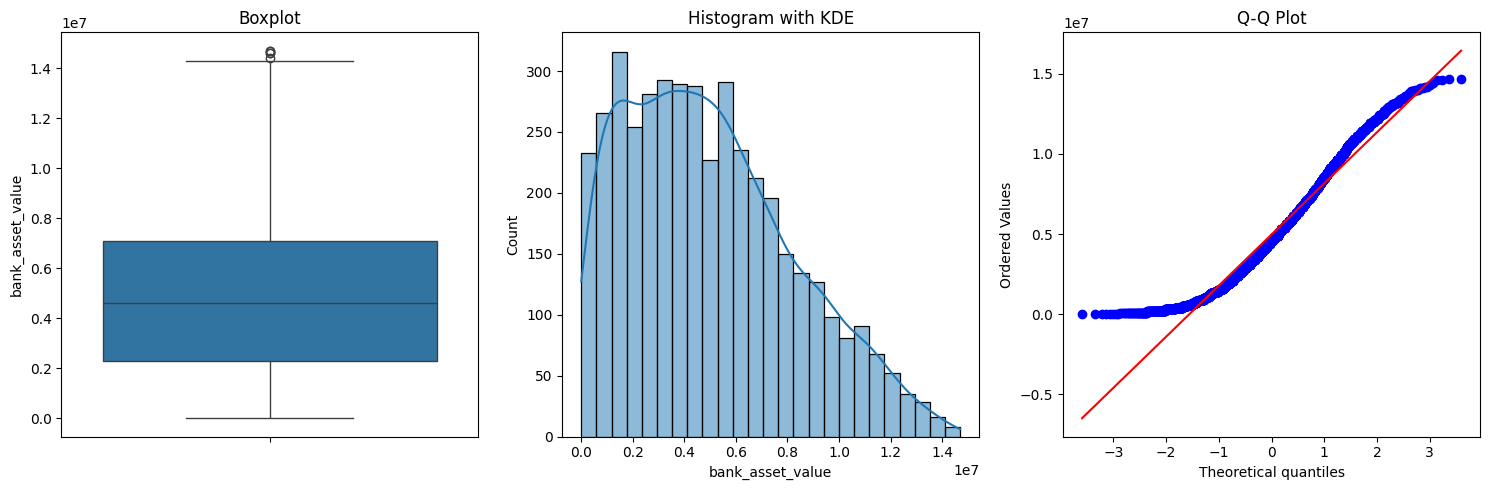

In [32]:
# Visualization fot bank_asset_value
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['bank_asset_value'])
plt.title('Boxplot')

plt.subplot(1, 3, 2)
sns.histplot(df['bank_asset_value'], kde=True)
plt.title('Histogram with KDE')

plt.subplot(1, 3, 3)
stats.probplot(df['bank_asset_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

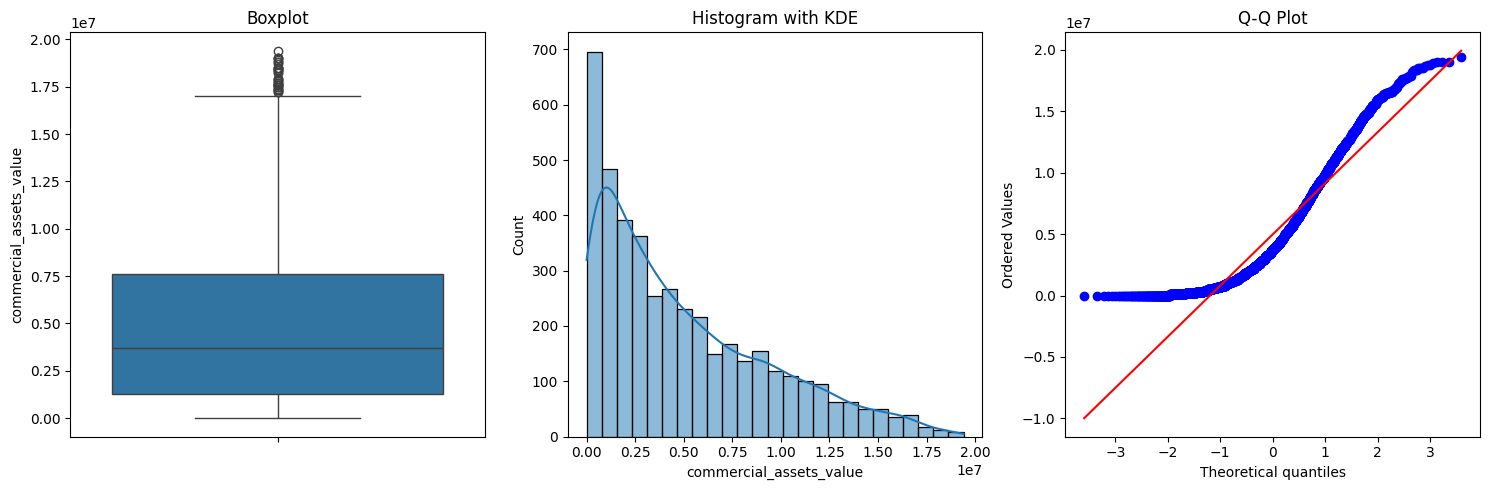

In [33]:
# Visualization fot commercial_assets_value
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['commercial_assets_value'])
plt.title('Boxplot')

plt.subplot(1, 3, 2)
sns.histplot(df['commercial_assets_value'], kde=True)
plt.title('Histogram with KDE')

plt.subplot(1, 3, 3)
stats.probplot(df['commercial_assets_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

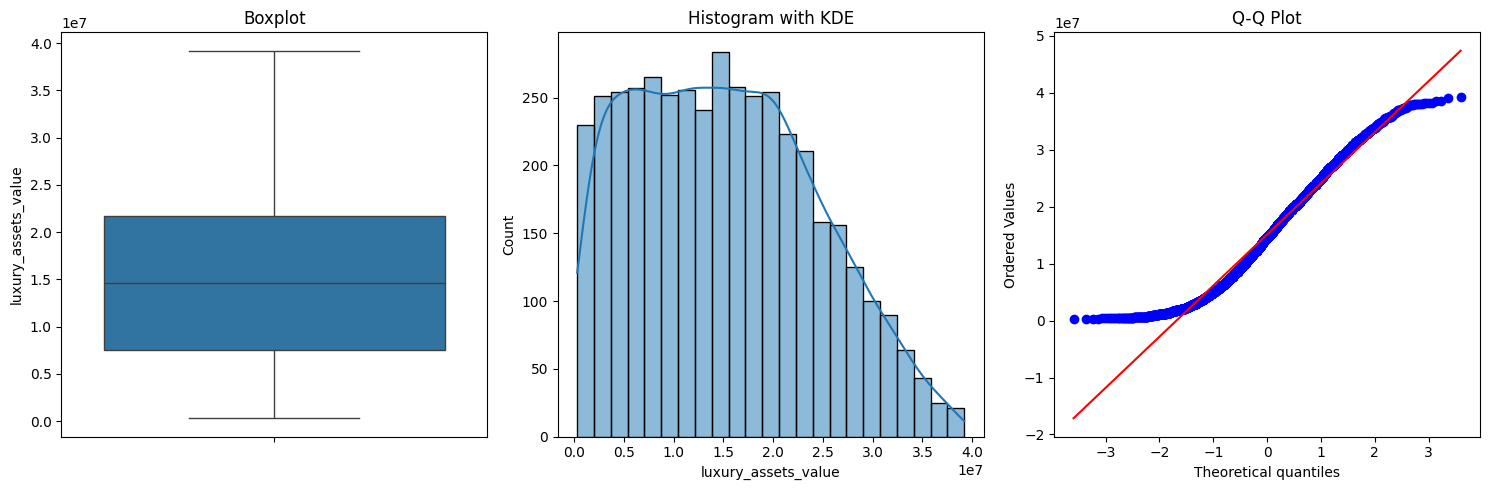

In [34]:
# Visualization fot commercial_assets_value
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['luxury_assets_value'])
plt.title('Boxplot')

plt.subplot(1, 3, 2)
sns.histplot(df['luxury_assets_value'], kde=True)
plt.title('Histogram with KDE')

plt.subplot(1, 3, 3)
stats.probplot(df['luxury_assets_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [35]:
def cap_outliers(df, column, method='IQR'):
    if method == 'IQR':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    elif method == 'zscore':
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std

    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply to all numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    df = cap_outliers(df, column, method='IQR')  # or 'zscore'

In [36]:
df.shape


(4269, 13)

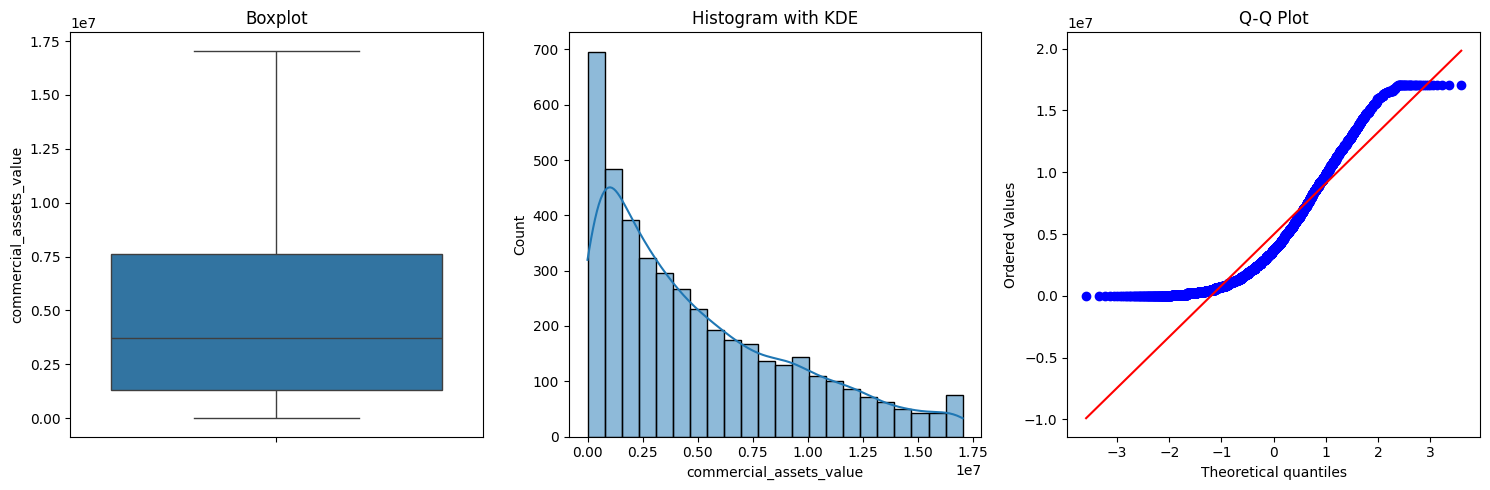

In [37]:
# Visualization fot commercial_assets_value
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['commercial_assets_value'])
plt.title('Boxplot')

plt.subplot(1, 3, 2)
sns.histplot(df['commercial_assets_value'], kde=True)
plt.title('Histogram with KDE')

plt.subplot(1, 3, 3)
stats.probplot(df['commercial_assets_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

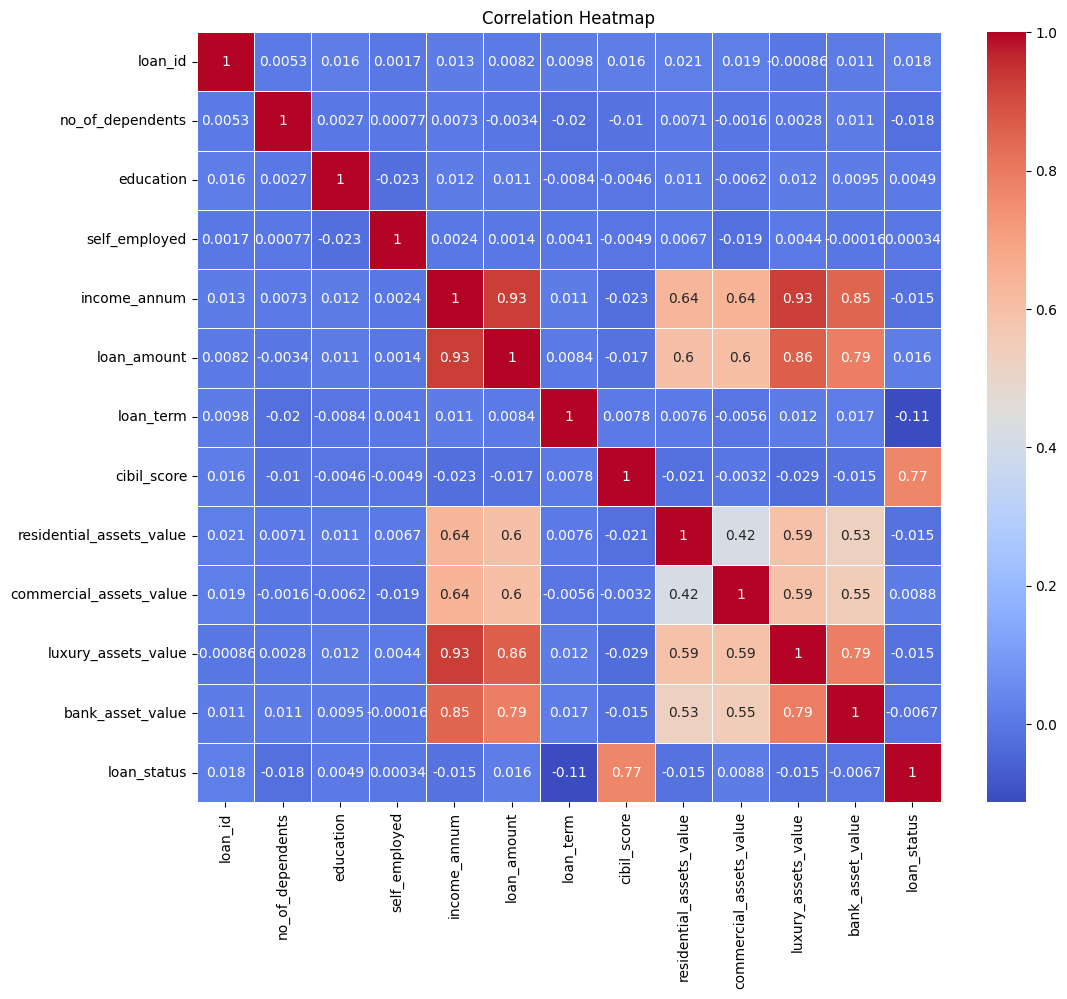

In [38]:
# Making a copy of the dataframe to avoid modifying the original
df_corr = df.copy()

# Encoding binary categorical variables
binary_cats = ['education', 'self_employed', 'loan_status']
for col in binary_cats:
    df_corr[col] = df_corr[col].map({'No': 0, 'Yes': 1, 'Not Graduate': 0, 'Graduate': 1, 'Rejected': 0, 'Approved': 1})

plt.figure(figsize=(12, 10))
# Create a correlation matrix using the numeric columns
correlation_matrix = df_corr.corr()
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

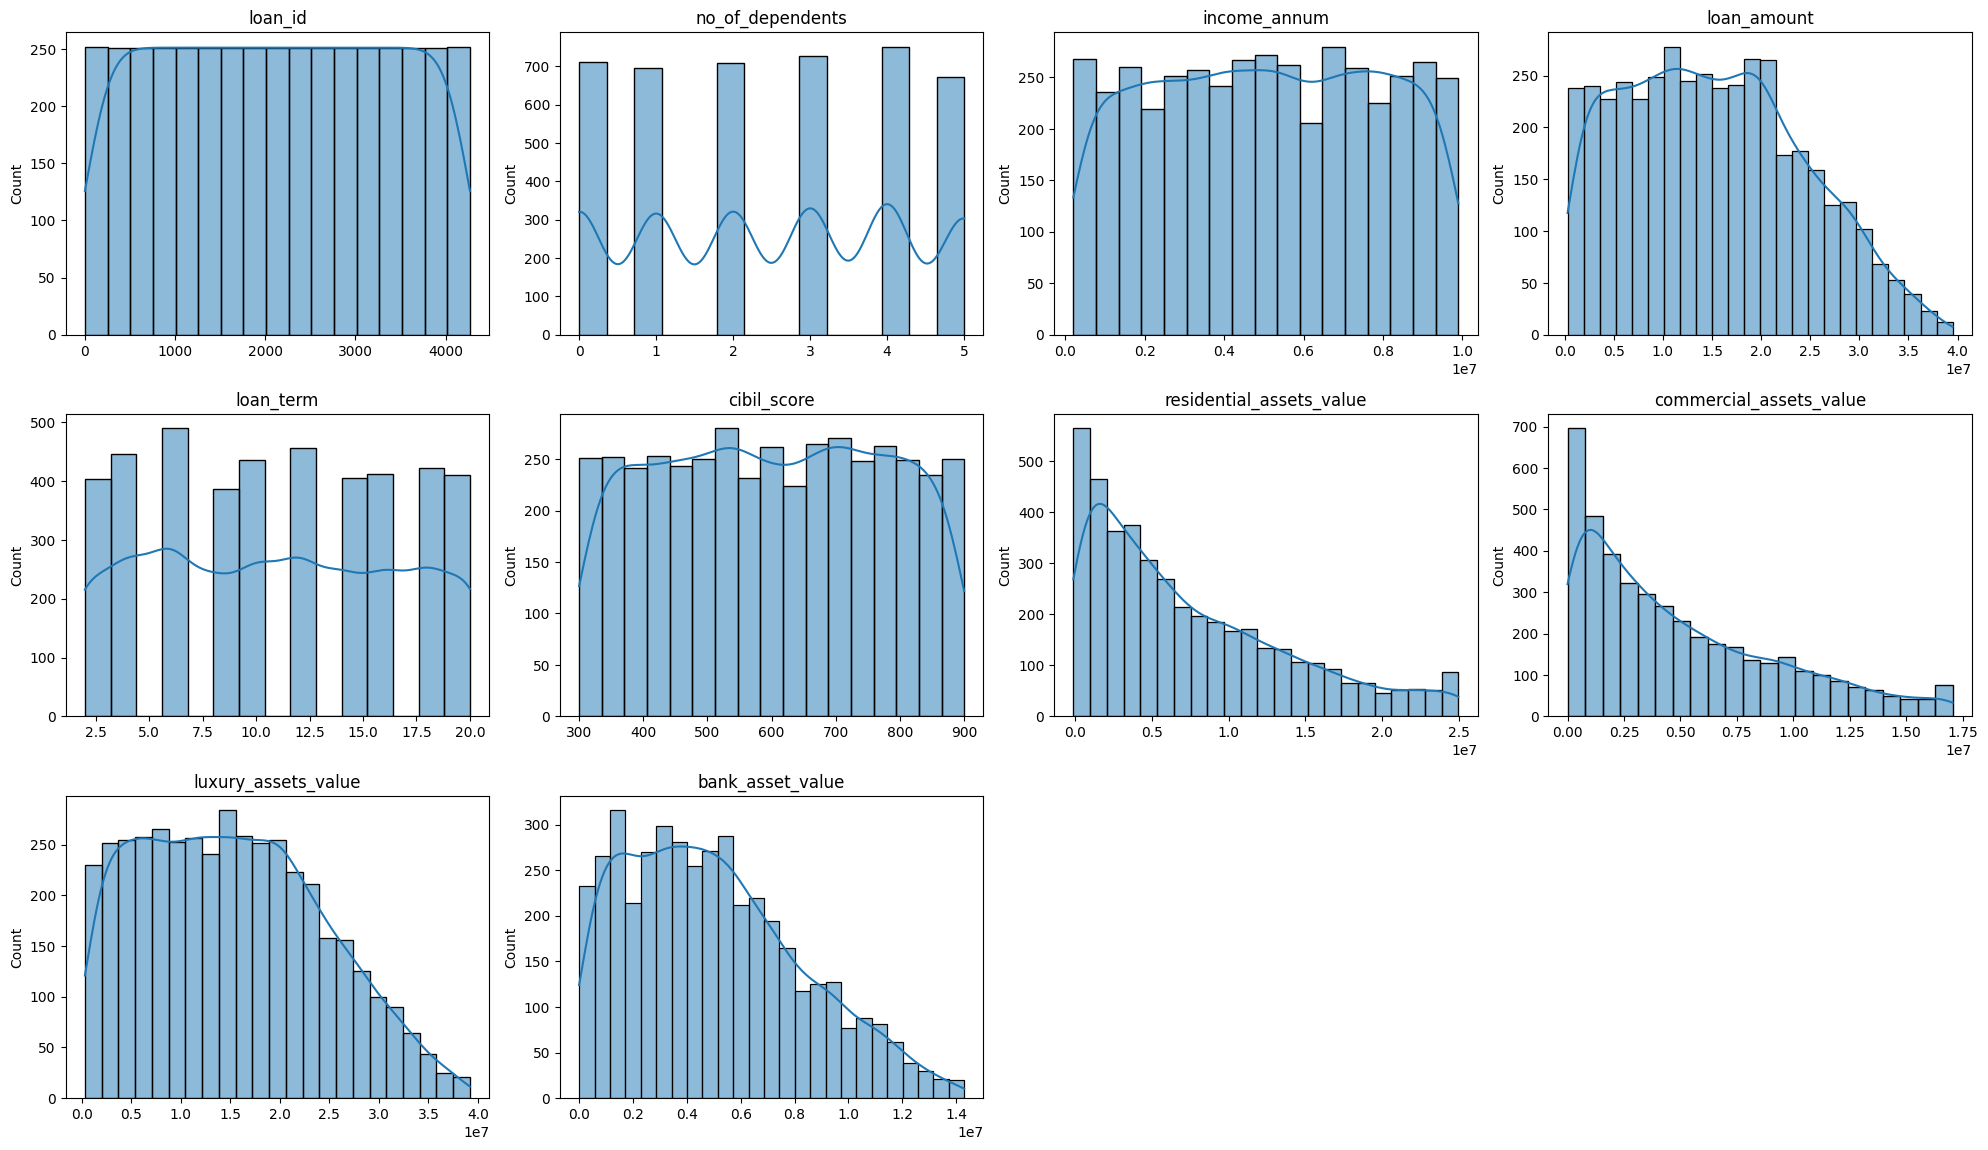

In [39]:
## DISTRIBUTION OF THE DATASET EACH FEATURE¶

# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Set up the plot
plt.figure(figsize=(20, 15))

# Create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

## VISUALIZATION NUMERIC FEATURES RELATIONSHIP(CORRELATION)

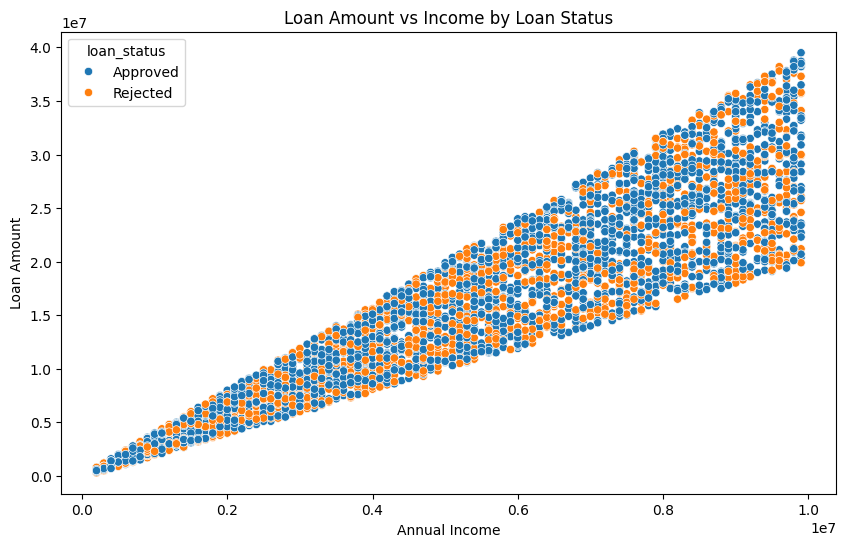

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income by Loan Status')
plt.show()

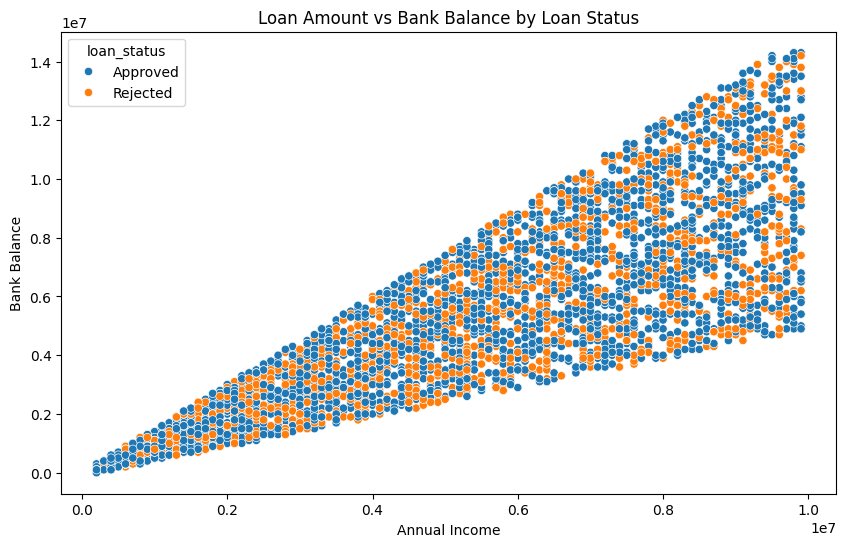

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_annum', y='bank_asset_value', hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Bank Balance')
plt.title('Loan Amount vs Bank Balance by Loan Status')
plt.show()

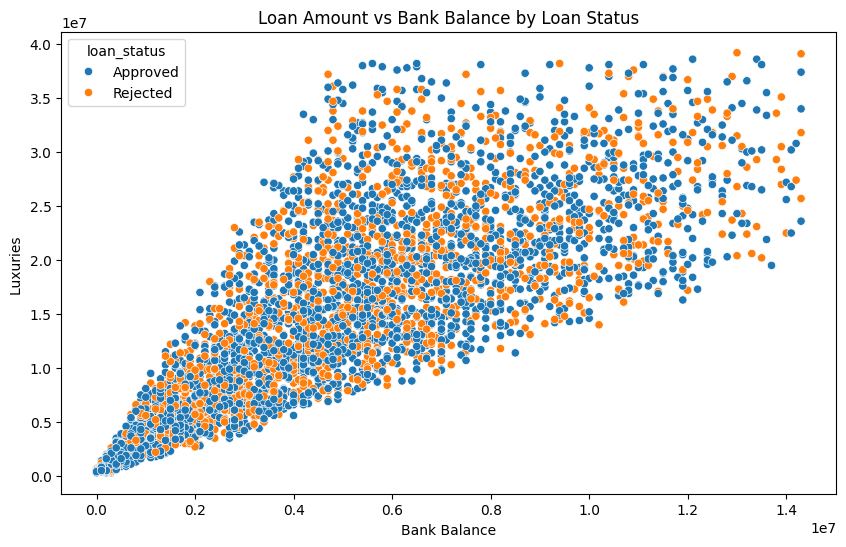

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bank_asset_value', y='luxury_assets_value' , hue='loan_status')
plt.xlabel('Bank Balance')
plt.ylabel('Luxuries ')
plt.title('Loan Amount vs Bank Balance by Loan Status')
plt.show()

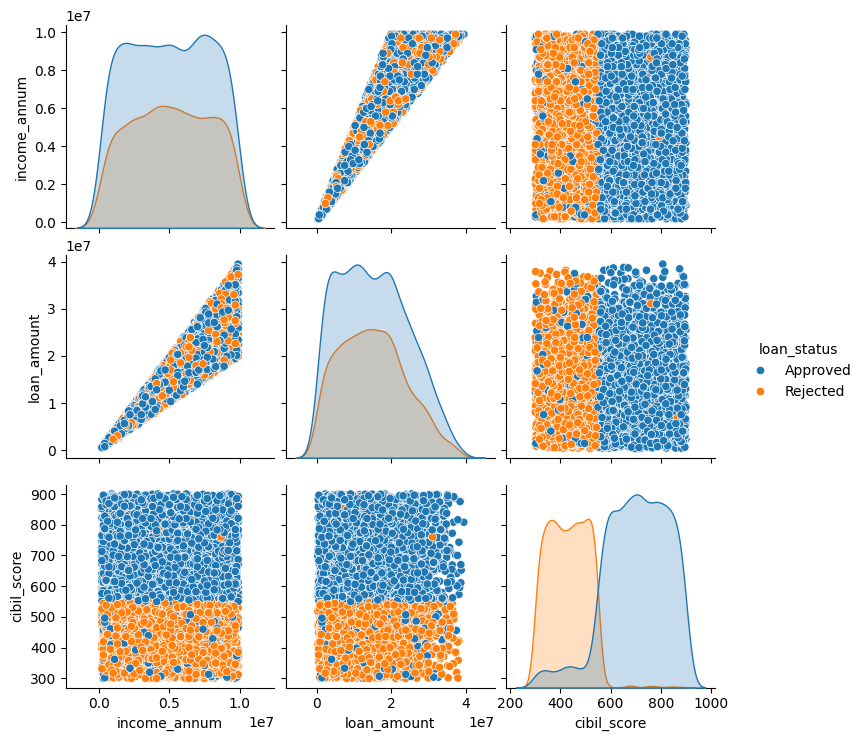

In [43]:
#Pair plot for key numeric variables:
sns.pairplot(df[['income_annum', 'loan_amount', 'cibil_score', 'loan_status']], hue='loan_status')
plt.show()

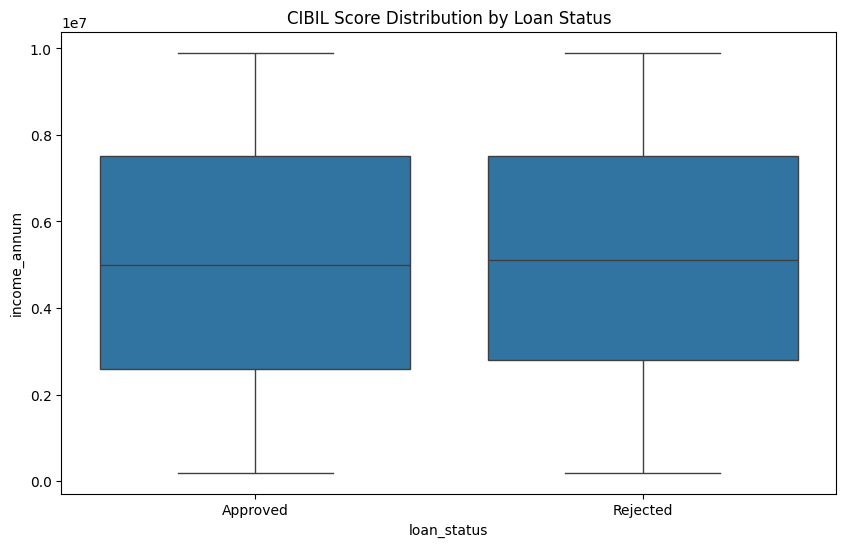

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title('CIBIL Score Distribution by Loan Status')
plt.show()

## ANALYZING THE FEATURE HAVING THE HIGH CHANCE OF LOAN APPROVAL¶


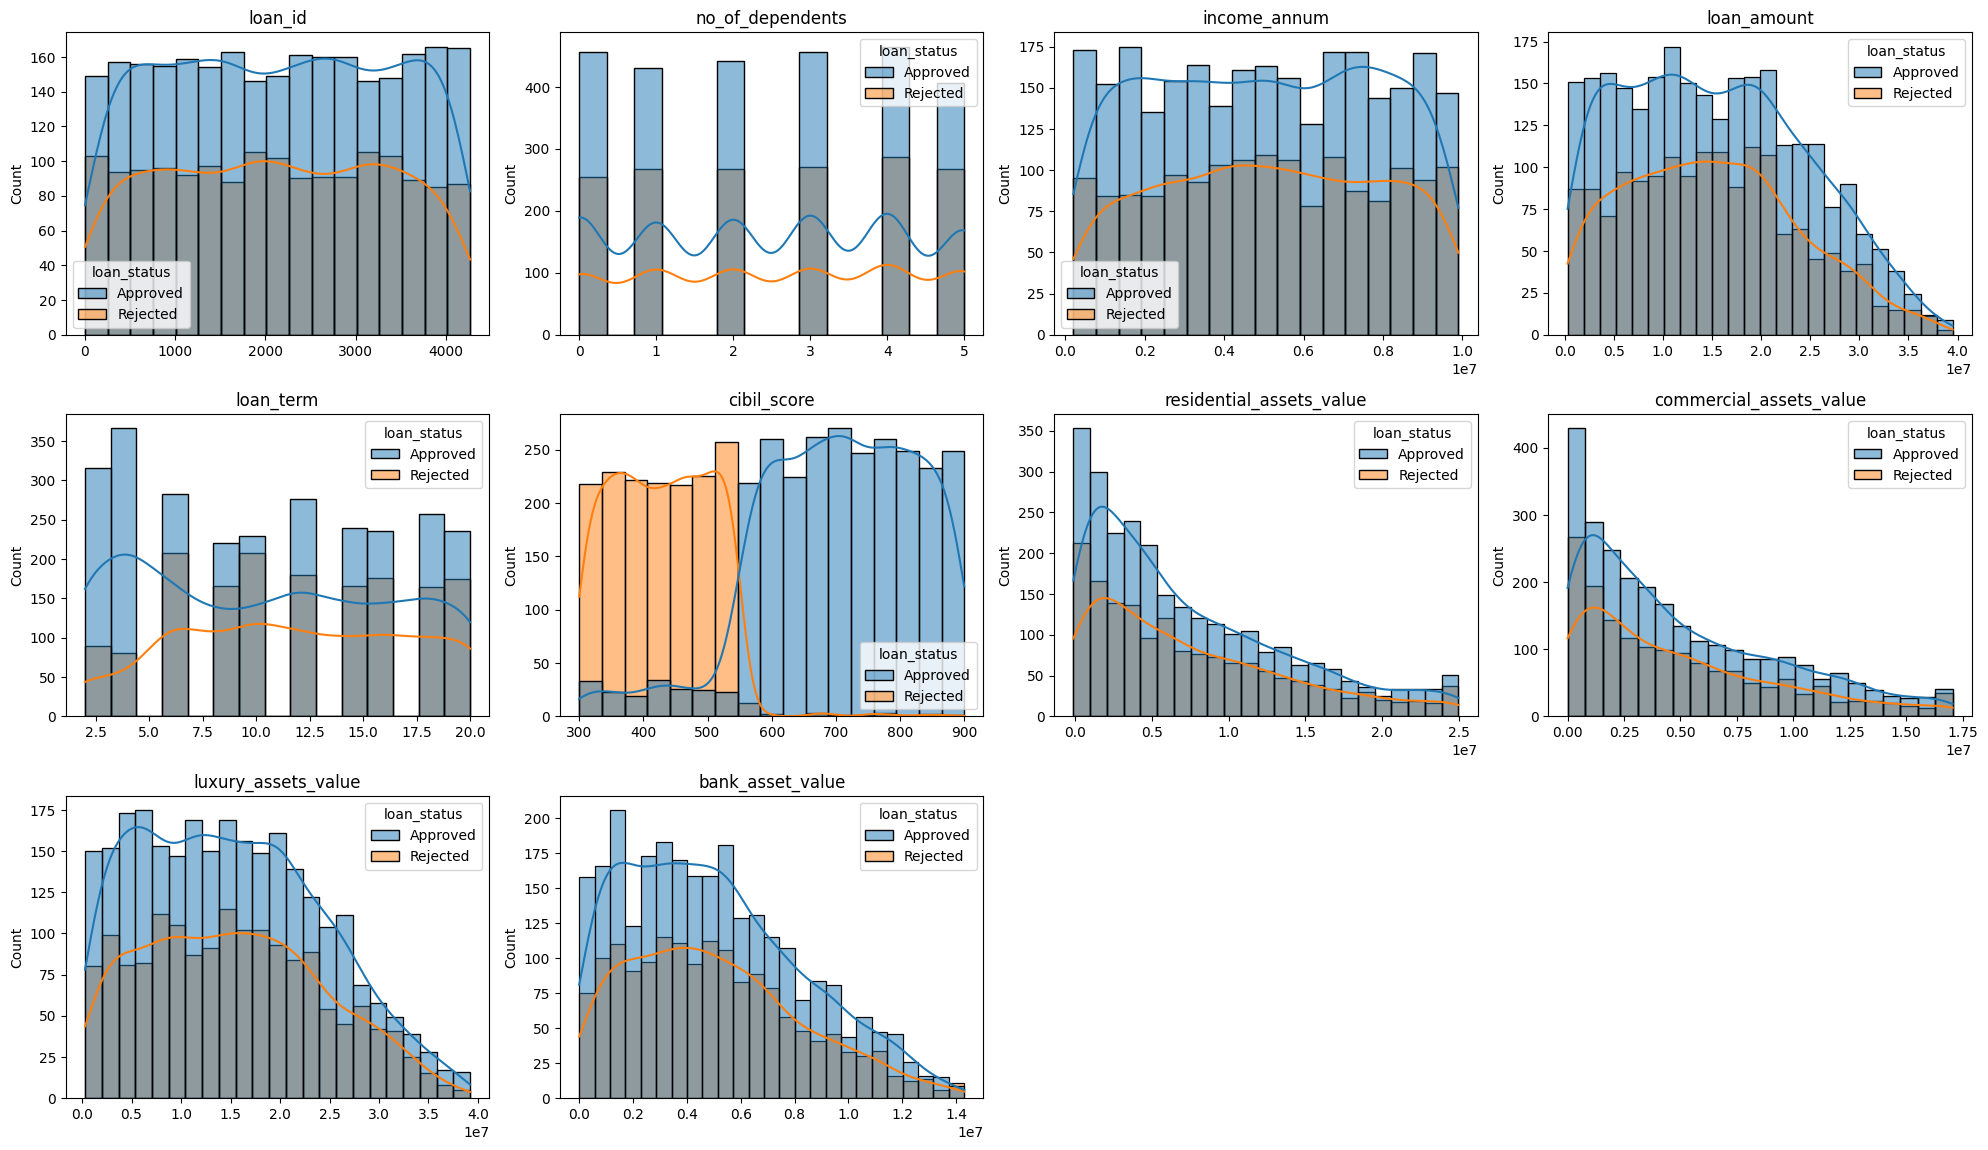

In [45]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Set up the plot
plt.figure(figsize=(20, 15))

# Create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, kde=True, hue='loan_status')
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

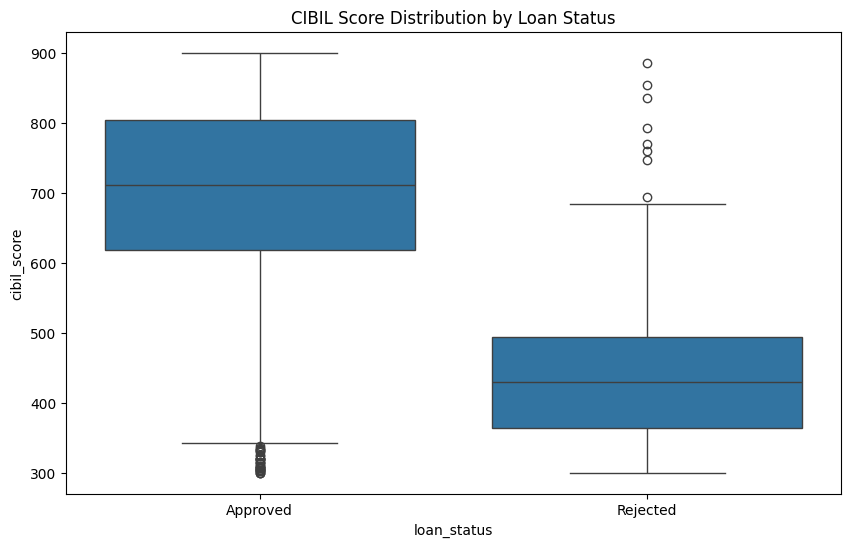

In [46]:
# CIBIL score distribution by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score Distribution by Loan Status')
plt.show()

## Analyzing Cause of the Outlier

CIBIL Score range:
count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64

Number of high CIBIL score (>700) rejections: 7


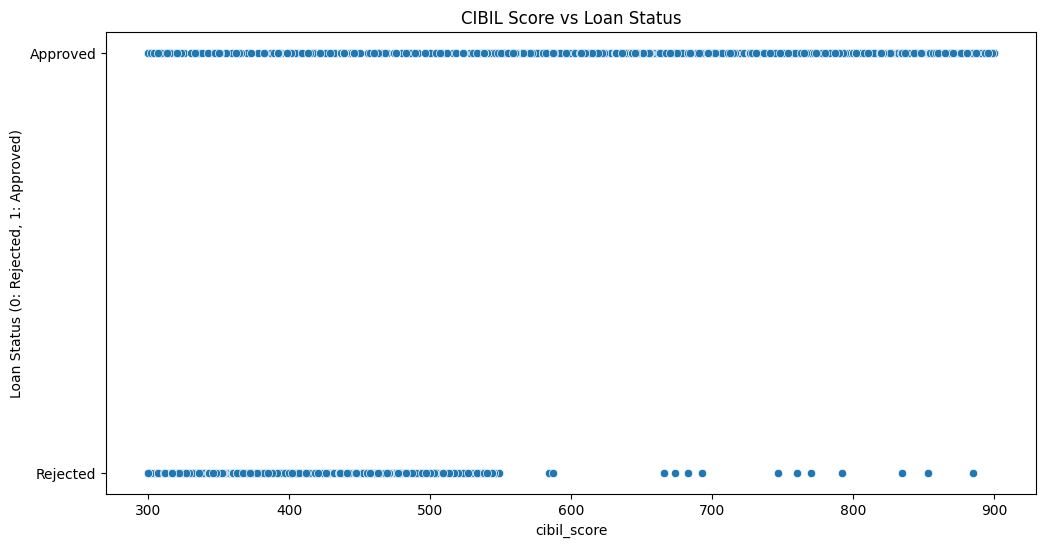

In [47]:
print("CIBIL Score range:")
print(df['cibil_score'].describe());

high_cibil_threshold = 700  # Adjust this value based on the CIBIL score range in your dataset
high_cibil_rejected = df[(df['cibil_score'] > high_cibil_threshold) & (df['loan_status'] == 'Rejected')]
print(f"\nNumber of high CIBIL score (>{high_cibil_threshold}) rejections: {len(high_cibil_rejected)}");

plt.figure(figsize=(12, 6))
sns.scatterplot(x='cibil_score', y='loan_status', data=df)
plt.title('CIBIL Score vs Loan Status')
plt.ylabel('Loan Status (0: Rejected, 1: Approved)')
plt.show();

## FEATURE SELECTION¶


In [48]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [49]:
# Drop unnecessary columns
columns_to_drop = ['loan_id']
df = df.drop(columns=columns_to_drop)

# Select features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
y = y.map({'Rejected': 0, 'Approved': 1})

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
## Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
knn = KNeighborsClassifier(n_neighbors=16)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=16)

Accuracy: 0.9016
Precision: 0.9330
Recall: 0.9086
F1-score: 0.9206
ROC-AUC: 0.8993


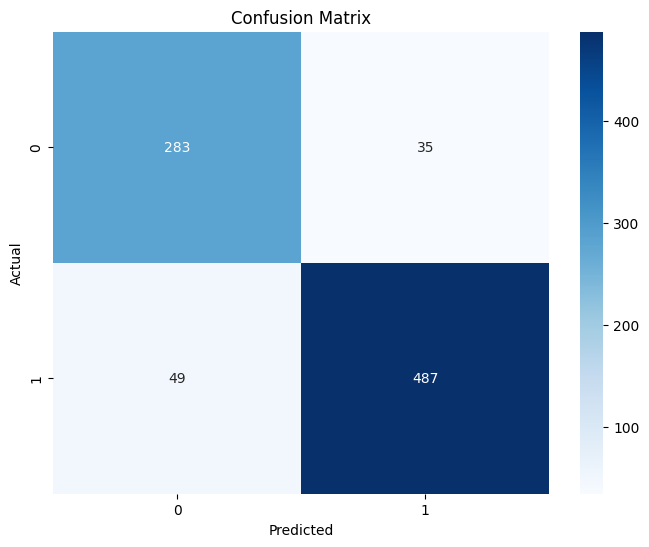

In [53]:
# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
## Cross Validation

cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.88726208 0.89751098 0.91508053 0.91800878 0.92093704]
Mean CV score: 0.9078


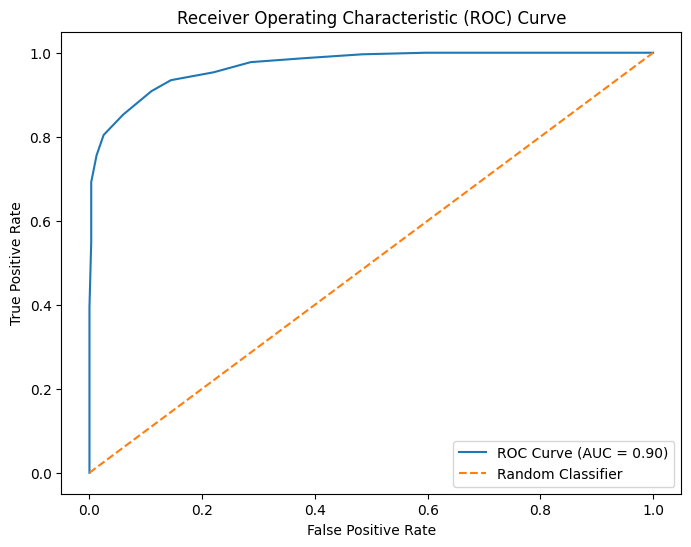

In [55]:
from sklearn.metrics import roc_curve

y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [56]:
df['loan_status'] = df['loan_status'].replace({' Approved':'Approved',' Rejected':'Rejected'})


In [57]:
import scipy.stats as stats
pvalue=[]
for i in df.drop('loan_status',axis=1).columns:
    if df[i].dtype=='object':
        stat,pval,_,_ = stats.chi2_contingency(pd.crosstab(df[i],df['loan_status']))
        pvalue.append(pval)
    else:
        a=df[df['loan_status']=='Approved'][i]
        b=df[df['loan_status']=='Rejected'][i]
        stat,pval = stats.ttest_ind(a,b)
        pvalue.append(pval)

In [58]:
pvalue


[0.23668903607722613,
 0.7720042291016309,
 1.0,
 0.321105124071832,
 0.29145225045092293,
 1.2911854638274257e-13,
 0.0,
 0.32764510326873786,
 0.5654817842360422,
 0.31240360685550905,
 0.6594761809451466]

In [59]:
col = ['education', 'self_employed','no_of_dependents','income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

In [60]:
sig = pd.DataFrame({'Features':col,'p-value':pvalue})
sig

,Features,p-value
0,education,2.366890e-01
1,self_employed,7.720042e-01
2,no_of_dependents,1.000000e+00
3,income_annum,3.211051e-01
4,loan_amount,2.914523e-01
5,loan_term,1.291185e-13
6,cibil_score,0.000000e+00
7,residential_assets_value,3.276451e-01
8,commercial_assets_value,5.654818e-01
9,luxury_assets_value,3.124036e-01


In [61]:
sig[sig['p-value']>0.05]['Features'].values


array(['education', 'self_employed', 'no_of_dependents', 'income_annum',
       'loan_amount', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value',
       'bank_asset_value'], dtype=object)

In [62]:
df = df[['education', 'self_employed', 'no_of_dependents', 'income_annum',
       'loan_amount', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value',
       'bank_asset_value','loan_status']]
df.head()

,education,self_employed,no_of_dependents,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,Graduate,No,2,9600000,29900000,2400000,17050000,22700000,8000000,Approved
1,Not Graduate,Yes,0,4100000,12200000,2700000,2200000,8800000,3300000,Rejected
2,Graduate,No,3,9100000,29700000,7100000,4500000,33300000,12800000,Rejected
3,Graduate,No,3,8200000,30700000,18200000,3300000,23300000,7900000,Rejected
4,Not Graduate,Yes,5,9800000,24200000,12400000,8200000,29400000,5000000,Rejected


In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [64]:
X_train_scaled.shape

(3415, 11)

In [65]:
y_train.shape

(3415,)

In [66]:
# sequential model
ann_model = keras.Sequential()

# adding dense layer
ann_model.add(Dense(250, input_dim=X_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

# adding dense layer with softmax activation/output layer
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 250)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         125,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 755,001 (2.88 MB)

 Trainable params: 755,001 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"]) # metrics=['accuracy']

In [68]:
history = ann_model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7609 - loss: 0.4500 - val_accuracy: 0.9209 - val_loss: 0.1879
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9242 - loss: 0.1941 - val_accuracy: 0.9473 - val_loss: 0.1567
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9216 - loss: 0.1950 - val_accuracy: 0.9356 - val_loss: 0.1655
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9358 - loss: 0.1698 - val_accuracy: 0.9458 - val_loss: 0.1507
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9371 - loss: 0.1731 - val_accuracy: 0.9488 - val_loss: 0.1462
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9363 - loss: 0.1667 - val_accuracy: 0.9341 - val_loss: 0.1517
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9460 - loss: 0.1350 - val_accuracy: 0.9531 - val_loss: 0.1196
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9373 - loss: 0.1630 - val_accuracy: 0.9722 - v

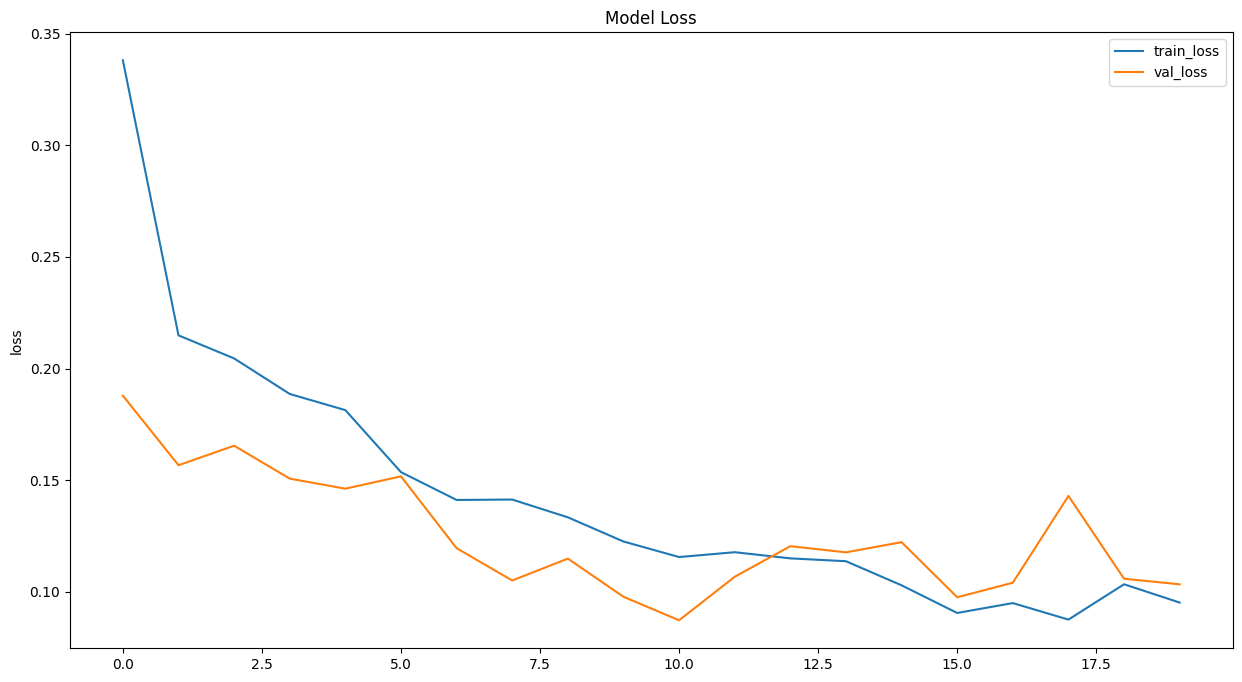

In [69]:
# Plot the model performance across epochs
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.savefig('modelloss.png', facecolor='w', bbox_inches='tight')
plt.show()

In [70]:
y_predict = ann_model.predict(X_test_scaled)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [71]:
y_pred = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [72]:
y_pred

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

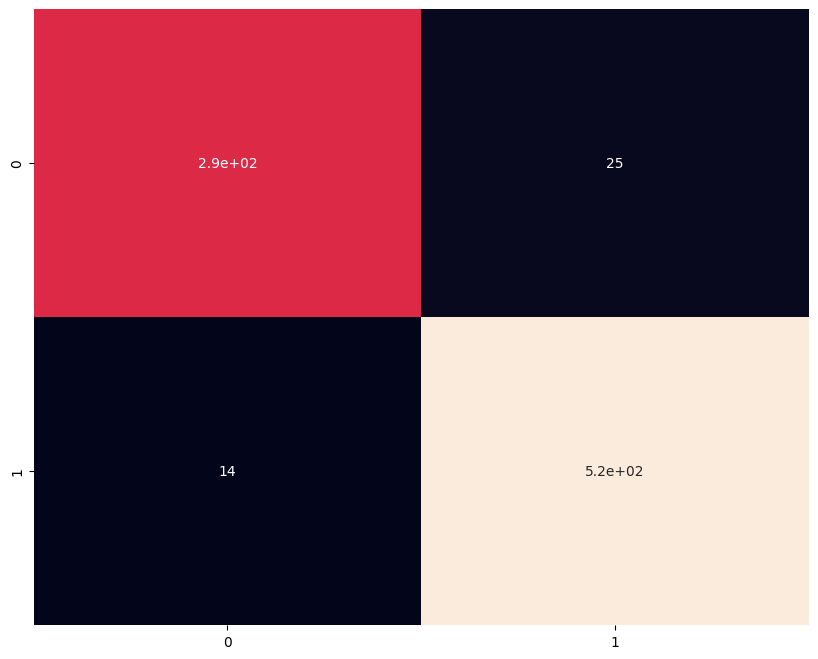

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cbar=False)
plt.savefig('conf_matrix.png', facecolor='w', bbox_inches='tight')
plt.show()

In [74]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       318
           1       0.95      0.97      0.96       536

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



## Categorical dataset

In [75]:
# Select features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
y = y.map({'Rejected': 0, 'Approved': 1})

In [76]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [77]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
# sequential model
ann_model = keras.Sequential()

# adding dense layer
ann_model.add(Dense(250, input_dim=X_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

# adding dense layer with softmax activation/output layer
ann_model.add(Dense(2, activation='softmax'))
ann_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 250)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 500)                 │         125,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             502 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 755,252 (2.88 MB)

 Trainable params: 755,252 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"]) # metrics=['accuracy']
history = ann_model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7916 - loss: 0.4401 - val_accuracy: 0.9473 - val_loss: 0.1535
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9143 - loss: 0.2382 - val_accuracy: 0.9561 - val_loss: 0.1389
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9309 - loss: 0.1792 - val_accuracy: 0.9429 - val_loss: 0.1527
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9306 - loss: 0.1904 - val_accuracy: 0.9136 - val_loss: 0.1939
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9431 - loss: 0.1521 - val_accuracy: 0.9517 - val_loss: 0.1297
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9431 - loss: 0.1448 - val_accuracy: 0.9517 - val_loss: 0.1389
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9442 - loss: 0.1521 - val_accuracy: 0.9327 - val_loss: 0.1433
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9453 - loss: 0.1443 - val_accuracy: 0.9546 - v

In [81]:
y_predict = ann_model.predict(X_test_scaled)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [82]:
y_predict

array([[9.9999946e-01, 4.8783176e-07],
       [2.3292945e-04, 9.9976707e-01],
       [9.9984550e-01, 1.5457092e-04],
       ...,
       [3.2843687e-08, 1.0000000e+00],
       [9.9999952e-01, 4.6016967e-07],
       [9.7035396e-01, 2.9646078e-02]], dtype=float32)

In [83]:
predictions = ann_model.predict(X_test_scaled)
predict = []

for i in predictions:
    predict.append(np.argmax(i))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [84]:
predict

[0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
